<a href="https://colab.research.google.com/github/MelchiorKaczmarzyk/InternshipTutorialCode/blob/main/basics01/InternshipExcersices02_missingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [574]:
import numpy as np
import pandas as pd
import sklearn

###Defining data

In [575]:
data = {
    "size": ["XL", "L", "M", np.nan, "M", 'M'],
    "color": ["red", "green", "blue", "green", "red", 'green'],
    "gender": ["female", "male", np.nan, "female", "female", 'man'],
    "price": [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    "weight": [500, 450, 300, np.nan, 410, np.nan],
    "bought": ["yes", "no", "yes", "no", "yes", 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,man,89.0,NaN,no


###Getting information about missing values from .info()

In [576]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


###Calculating how much data is *missing*

In [577]:
df = df_raw.copy()
# "%" of missing data in each column
df.isnull().sum() / len(df)
# It could be useful to check % of missing data in a row to figure out if we can delete it
# Wait for it... *

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

###Using SimpleUmputer with various imputing strategies

In [578]:
from ast import Constant
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['weight']] = imputer.fit_transform(df[['weight']])

In [579]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99)
df[['price']] == imputer.fit_transform(df[['price']])

,price
0,True
1,True
2,False
3,True
4,True
5,True


In [580]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
df[['size']] = imputer.fit_transform(df[['size']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,man,89.0,415.0,no


In [581]:
df[['size']] = df_raw[['size']].copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

###Back to where we started


In [582]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,man,89.0,NaN,no


###Finding null values in columns


In [583]:
# * IT'S HERE!
pd.isnull(df['weight']).sum() / len(df['weight'])

0.3333333333333333

###Finding only rows with null values in a given column

In [584]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,man,89.0,NaN,no


In [585]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


### Simple filling

In [586]:
# Can also be used on specific rows
#inplace=True makes the changes to actually happen to the df object
df.fillna(value='missing!', inplace=True)

### Deleting rows with missing values

In [587]:
# Can be honed using parameters to delete rows with various part of it's data missing
df = df.dropna()

### Time sequences and interpolation

In [588]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
data_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=data_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


### Plotting data

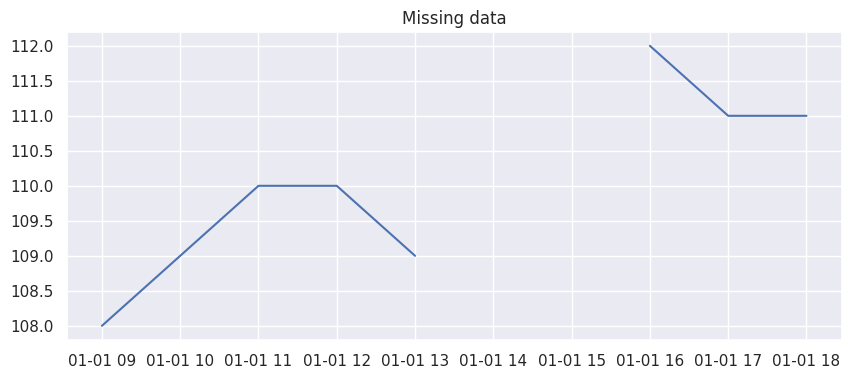

In [589]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters
sns.set()

plt.figure(figsize=(10,4))
plt.title("Missing data")
_ = plt.plot(df.price)

In [590]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title="Time sequences - missing data")

Removing rows with missing data

In [591]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title="Time sequences - missing data - removing missing data")

In [592]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Time sequences - missing data - filling with 0")

### Filling with constant (mean)

In [593]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Time sequences - missing data - filling with mean")

### Interpolating

In [594]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Time sequences - missing data - interpolating")

### Forward fill


In [595]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Time sequences - missing data - forward fill")

###Backward fill

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Time sequences - missing data - backward fill")